# Lab 6

Today we continue exploring **dimension reduction** to help us get a handle on large dimensional data. Today's goals are:

0. Understand how to use the `sklearn` implementation for PCA
1. Determine what the "right" lower dimension is
2. Introduce _Singular Value Decomposition_
3. Compare and contrast PCA and SVD

In [1]:
# Import block
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

For easier comparisons, we will continue with the ever exciting `students_info.csv` file. Please import this in `pandas` and then create a `numpy` array with only the numerical variables

In [2]:
# Import data
students = pd.read_csv("../Lab03/students_info.csv")

In [3]:
# Create justnum with only the numerical data
justnum = students[["coffee", "sleep", "gym", "gpa"]].to_numpy()

### Preparing the data

Recall that for PCA, we need to have normalized data. Before continuing, create `justnum_std` that _standardizes_ each variable. 

In [4]:
# Standardizing our variables:
mean_vec = np.mean(justnum, axis=0)
sd_vec = np.std(justnum, axis=0)

justnum_std = justnum.copy()

for i in range(justnum.shape[1]):
    justnum_std[:,i] = (justnum[:,i] - mean_vec[i]*np.ones(justnum.shape[0]))/sd_vec[i]


In [5]:
# Check your creation of justnum_std


In [6]:
# You may want to create a few plots

In [7]:
# Another block for exploration 


## PCA in `sklearn`

PCA in `sklearn` works much the way that kmeans did. We first set up how PCA will function and then apply the particular PCA that we have crafted to our data. 

As we did with kmeans, we will take each step individually, exploring the output that we generate. 

In the below code block, we have one possible setting of `PCA()` in `sklearn`.
* What _type_ is the output and what information is contained within `PCA`? 
* What are the various parameters doing? 

In [9]:
# Step one: Set up PCA
pca_alg = PCA(n_components=2)

In [10]:
# Code block for further discovery
type(pca_alg)
print(pca_alg)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


As with kmeans, now that we have set up our PCA, we can _fit_ it to our data. We can `fit` our data and then `transform` it; or if we prefer, we can do both using `fit_transform`.

#### Using `.fit()`

This first fitting applies our PCA to the data. What _type_ is the output and what information is contained within `pfit`?

In [13]:
pfit = pca_alg.fit(justnum_std)

In [11]:
# Code block for further discovery



AttributeError: 'PCA' object has no attribute 'components_'

It's not immediately obvious how to access the principal components. The result of `.fit()` wraps this information inside a class style object. We can use `.components_` to access the principal components: 

In [14]:
print("Shape of the resulting components\n", pfit.components_.shape)

print("\n Actual components \n",pfit.components_)

Shape of the resulting components
 (2, 4)

 Actual components 
 [[-0.68413286  0.11610783 -0.69792798 -0.17713762]
 [ 0.19357127  0.70157473  0.09919856 -0.67858876]]


Is this what we expect to see? Why or why not? 

Take a minute to explain. 






##### PCA `.fit` result

The output of `fit()` is a _transition_ matrix. This is the matrix that "carries" our data from a higher dimension down to the lower one. What `.fit` does **not** do is carry out this tranformation. For that step, we need to use `.transform()`. 


#### Using `.transform()`

So far, we have set-up our PCA and applied it to our data to get our transition matrix. To actually send our data to the lower dimensional space, we _transform_ our data using `transform()`. 


_Note_ - Both `.predict` for kmeans and `transform` for PCA in `sklearn` are similar in the sense of _extending_ the common applications of their algorithms respectively. However, in the case of PCA, simply stopping at the _transition_ matrix feels a bit odd as the _dimension reduction_ has not yet occurred. To complete the dimension reduction, we use `transform()`. 

In [15]:
justnum_intwo = pca_alg.transform(justnum_std)


In [ ]:
# Check the new lower dimensional result - 


In [ ]:
# Create a 2D plot of the new lower dimensional result

Is this what you expect given what you know about this data? Why or why not? 

### Using `fit_transform()` 

We can fit our PCA to our data and do the dimension reduction in one step using `fit_transform()`:

In [16]:
justnum_intwo_onestep = pca_alg.fit_transform(justnum_std)

In [ ]:
# Add a layer to compare the previous result to this one. 
# Your goal with this plot is to confirm that you have the same result

# Create the plot from above with larger but fainter circles: 
plt.scatter(????, ????, s = 100, alpha = 0.5)
# Layer with the new variable represented with little x markers
plt.scatter(????, ????, marker = "x", c = 'k')

#### Aside - `transform` is just matrix multiplication

All that `.transform` is doing is _right_ multiplying our data with the transition matrix. In fact, if we define `trans_mat` as follows, we can 

In [17]:
trans_mat = pfit.components_
justnum_intwo_mult = np.dot(justnum_std,trans_mat.T)

In [ ]:
# Check that the shape is what we expect



In [ ]:
# Add a layer to compare the previous result to this one. 
# Your goal with this plot is to confirm that you have 
#      the same result using multiplication
# Hint - It should look exactly like the above one, but 
#        with a different variable in the last line





#### Wrapping up PCA 

Before moving on, apply PCA to `justnum_std` for 1, 3, and 4 components. Create visualizations for 1 and 3 dimensions. Considering the two dimensional ones that we created, what is the right number of components? **Justify** your choice. 

Below are a few code blocks for your experiments and plots. 

**Wait here for a class discussion** 

## Choosing the _lower_ dimension

The goal of PCA is a dimension reduction. The question becomes how far should we reduce? What is the "right" lower dimension? After our adventure with k-means, it should come as no surprise that there is no universally accepted "answer" for choosing the right number for the lower dimension. If your primary reason for reducing the dimension is for data visualization, then many times the "answer" is 2 for the _target_ dimension. 

If your goal is to reduce your data to speed up algorithms or to simply remove redundant information, then you might look at how much your reduction _explains_ of the original data. Encapsulated in the `explained_variance_ratio_` is a notion of explanation. 

### Total Explained Variation 

Most data is spread out. Data that is more spread from each other with varying notions of "near" and "far", we call data of _high variance_ and by contrast data with _low variance_ is data that tends to be very tightly clustered together. The idea of _variance_ is to give us a notion of how spread (or not) our data is. It can also be thought of as a notion of the variation in between our data points. 

PCA seeks to be a summary of our original data. We want it to be a decent summary that gives us close approximation of the data. To give us an idea of how well our PCA works, we can compute how much of the original data's variation is _explained_ by each principal component. In `sklearn` this information is captured in `explained_variance_ratio_` or the ratio of the **total** variance that is explained by a particular component. 

The `explained_variance_ratio_` is an attribute of our fitted PCA. Compute PCA with four components and plot the `explained_variance_ratio_`

In [22]:
pca_alg = PCA(n_components=4)
pfit4 = pca_alg.fit(justnum_std)

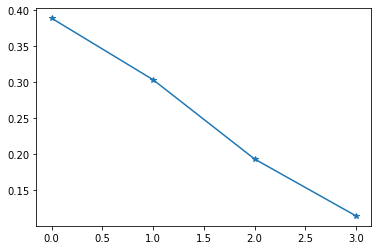

In [23]:
plt.plot(pfit4.explained_variance_ratio_, marker='*')

When the number of components matches the dimension of the data, the sum of the `explained_variance_ratio_` should equal one. Check that this is true:

In [29]:
# Your check here: 



-1.1102230246251565e-16


_Note_ - If yours is not exactly one, check that the difference between your answer and 1 is below _machine tolerance_ or about $10^{-14}$:

In [30]:
mach_tol = 10e-14
print(np.abs(np.sum(pfit4.explained_variance_ratio_)-1) < mach_tol)

True


(Take a minute to unpack what is in the second check. What does each piece do? Why are they so tightly wrapped?)

### Using `explained_variance_ratio_` to choose the "right" dimension

In `explained_variance_ratio_` we have how much each principal component explains. As we can see above, the added benefit of each one goes down. This is related to the fact that the computation of `explained_variance_ratio_` has to do with the eigenvalues associated to each principal component (which by construction are in decreasing order). 

It would be much more helpful if we could see how much the cumulative contribution of the first component, the second component with the first, the third component with the first and the second, and so on. Now, while we could write a `for` loop, let's take a page out of our text _Python Machine Learning_ and use the numpy command `cumsum`:

In [31]:
cum_variance = np.cumsum(pfit4.explained_variance_ratio_)

The function `cumsum()` takes cumulative sums in progressing order. To illustrate what this means run the following code block:

In [33]:
test_cumsum = np.cumsum([1,2,3,4,5])
print(test_cumsum)

[ 1  3  6 10 15]


Notice that that the first entry in the output is the value of the first index. The second entry is the sum of the the values associated to the first two indices, and so on. 

Returning to our cumulative variance, let's now plot this output against the individual contributions:

<BarContainer object of 4 artists>

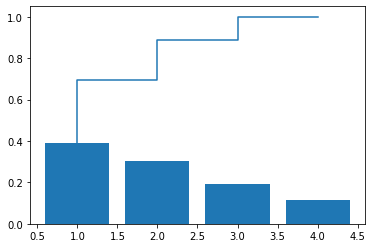

In [38]:
plt.step(range(1,5),cum_variance)
plt.bar(range(1,5),pfit4.explained_variance_ratio_)

# Plot based on image on Page 148 in _Python Machine Learning_

What we should see in this plot is how much each piece contributes 

## Singular Value Decomposition (SVD)

SVD is linear algebra at its finest (though I promise not to explore that tangent). 



### Sparsity 

What is _sparse_ data? Is it bad or good? 

### Truncated SVD

There are a few flavors of SVD. 

## PCA & SVD - A Comparison



### Final Thoughts

To finish up this lab, read about the [PCA implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in `sklearn` and create a post to **#lab_submission** channel on slack sharing one surprising thing about PCA that you learned by first walking through it and then reading about it in `sklearn`. Your post must start with **Lab6** to get credit. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab6**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. _Python Machine Learning_
2. [PCA `sklearn` helpfile](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
3. [Truncated SVD `sklearn` helpfile](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)
4. [SVD `numpy` helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
5. [What is principal component analysis? from "Bits of DNA"](https://liorpachter.wordpress.com/2014/05/26/what-is-principal-component-analysis/)
6. [Explained variance in PCA](https://ro-che.info/articles/2017-12-11-pca-explained-variance)